In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [6]:
pd.set_option('display.max_rows', 1000)


In [7]:
pd.options.display.max_columns = 1000

In [8]:
mtf =pd.read_csv('DATA/Mobile_Telecommunications_Franchise_Pole_Reservation_Locations.csv', delimiter = ',', header = 0)
imp =pd.read_csv('DATA/Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv', delimiter = ',', header = 0)

#### LET THE DATA CLEANING BEGIN! 

DATASET 1 - 
Mobile Telecommunications Franchise Pole Reservation Locations CLEANING

These rows will remove all columns and rows deemed uneccessary 
We are removing Park, School, Historic, Scenic and Bid Advisory pole locations as these require extended approval 
that is too time consuming for our end use. 
removed all nulls

Locations of street light poles, traffic light poles and utility poles reserved by companies authorized by the New York City Department of Information Technology and Telecommunications for the potential installation of mobile telecommunications equipment.


In [9]:
mtf2=mtf

In [10]:
mtf2 = mtf2[pd.isnull(mtf2['Park Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['School Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['Historic Landmark Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['Scenic Landmark Advisory'])]
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282 entries, 48 to 10968
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          9282 non-null   int64  
 1   Reservation Date            9282 non-null   object 
 2   Franchisee Name             9282 non-null   object 
 3   Status                      9282 non-null   object 
 4   Pole Class                  9282 non-null   object 
 5   Borough                     9282 non-null   object 
 6   X Coord.                    9282 non-null   float64
 7   Y Coord.                    9282 non-null   int64  
 8   Latitude                    9282 non-null   float64
 9   Longitude                   9282 non-null   float64
 10  Zone                        9282 non-null   object 
 11  On street                   9282 non-null   object 
 12  Cross street 1              9282 non-null   object 
 13  Cross street 2              927

In [11]:
mtf2.dropna(axis=1, how='all', inplace=True)

In [12]:
mtf2.drop('BID Advisory', axis=1, inplace= True)

In [13]:
mtf2.dropna(inplace= True)

In [14]:
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9272 entries, 48 to 10968
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                9272 non-null   int64  
 1   Reservation Date  9272 non-null   object 
 2   Franchisee Name   9272 non-null   object 
 3   Status            9272 non-null   object 
 4   Pole Class        9272 non-null   object 
 5   Borough           9272 non-null   object 
 6   X Coord.          9272 non-null   float64
 7   Y Coord.          9272 non-null   int64  
 8   Latitude          9272 non-null   float64
 9   Longitude         9272 non-null   float64
 10  Zone              9272 non-null   object 
 11  On street         9272 non-null   object 
 12  Cross street 1    9272 non-null   object 
 13  Cross street 2    9272 non-null   object 
 14  Zipcode           9272 non-null   int64  
 15  Community Board   9272 non-null   int64  
 16  Council District  9272 non-null   int64 

In [15]:
mtf2.reset_index(drop=True)

,Id,Reservation Date,Franchisee Name,Status,Pole Class,Borough,X Coord.,Y Coord.,Latitude,Longitude,Zone,On street,Cross street 1,Cross street 2,Zipcode,Community Board,Council District
0,10270,09/26/2014,Crown Castle NG,Installed,CITY,Manhattan,992253.0,224437,40.782700,-73.971102,A,Central Park West,W 82nd st,W 83rd st,83,164,6
1,10179,09/26/2014,Crown Castle NG,Installed,CITY,Manhattan,989795.0,220004,40.770535,-73.979981,A,Central Park West,63rd Street,64th Street,83,164,6
2,6761,04/14/2009,Crown Castle NG,Installed,CITY,Manhattan,996598.0,226568,40.788544,-73.955408,B,5th Ave,E 97th St,E 96th St,83,164,6
3,17499,12/22/2017,Crown Castle NG,Proposed,CITY,Manhattan,989773.0,219965,40.770428,-73.980060,A,Central Park West,W 63rd St,W 62nd St,83,164,6
4,21620,07/10/2019,ExteNet I,Proposed,CITY,Manhattan,986889.0,213037,40.751413,-73.990475,A,7 AVE,W 34 ST,W 35 ST,10001,105,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,19711,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1005706.0,143379,40.560192,-73.922782,B,Bath Walk,Rockaway Point Blvd,Seabreeze Walk,11697,414,32
9268,19707,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1007537.0,142787,40.558563,-73.916194,B,207st,8th Ave,7th Ave,11697,414,32
9269,19706,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1006067.0,142004,40.556417,-73.921487,B,Marion Walk,Breezy Point Blvd,Oceanside Ave,11697,414,32
9270,19705,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1003848.0,141775,40.555794,-73.929473,B,Beach 221nd St,4th Ave,Breezy Point Blvd,11697,414,32


DATASET 2 - (IMP) Internet Master Plan: Adoption and Infrastructure Data by Neighborhood
Key indicators of broadband adoption, service and infrastructure in New York City.

In [16]:
mtf.columns = [item.replace(" ","_") for item in mtf.columns]
mtf.columns = [item.replace("(","_") for item in mtf.columns]
mtf.columns = [item.replace(")","_") for item in mtf.columns]
mtf.columns = [item.replace(".","_") for item in mtf.columns]

In [17]:
#imp rows edtited to remove commas and change data types to numeric values
imp['Total Population'] = imp['Total Population'].str.replace(',', '').astype(int)
imp['Population Density (per Sq. Mi.)'] = imp['Population Density (per Sq. Mi.)'].str.replace(',', '').astype(float)
imp['Total Number of Households'] = imp['Total Number of Households'].str.replace(',', '').astype(int)
imp['Number of Households'] = imp['Number of Households'].str.replace(',', '').astype(float)
imp['Total Accounts'] = imp['Total Accounts'].str.replace(',', '').astype(float) 
imp['Estimated Number of Businesses'] = imp['Estimated Number of Businesses'].str.replace(',', '').astype(float)
imp['Account Density'] = imp['Account Density'].str.replace(',', '').astype(float)
imp['Population Projections 2050'] = imp['Population Projections 2050'].str.replace(',', '').astype(float)
imp['Households Receiving Benefits'] = imp['Households Receiving Benefits'].str.replace(',', '').astype(float)


In [18]:
imp['Estimated Lifeline Eligible Households'] = imp['Estimated Lifeline Eligible Households'].str.replace(',', '').astype(float)
imp['Supportive Housing (NYCDHS)'] = imp['Supportive Housing (NYCDHS)'].str.replace(',', '').astype(float)
imp['Low-Income Housing (NYCHA)'] = imp['Low-Income Housing (NYCHA)'].str.replace(',', '').astype(float)

In [19]:

imp = imp.astype({"Poles Reserved by Mobile Telecom Franchisee": float, "Pole with Equipment Installed by Mobile Telecom Franchise": float, "Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise":float})

In [20]:
imp = imp.rename(columns = {'Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves': 'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves'})

In [21]:
imp.columns = [item.replace(" ","_") for item in imp.columns]
imp.columns = [item.replace("(","_") for item in imp.columns]
imp.columns = [item.replace(")","_") for item in imp.columns]
imp.columns = [item.replace(".","_") for item in imp.columns]

In [22]:
imp = imp.rename(columns = {'Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves': 'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves'})

In [23]:
# imp.drop(imp.index[87], inplace = True)

In [24]:
imp.drop('Empire_City_Subway_Coverage__Quartile_', axis=1, inplace= True)

In [25]:
bool_series = pd.isnull(imp["Estimated_Number_of_Businesses"])
imp[bool_series]
#This returned null values as neighborhoods designated as cemetaries, Queens Airport and Rikers Island

,Neighborhood_Tabulation_Area_Code__NTA_Code_,Neighborhood_Tabulation_Area_Name__NTA_NAME_,Borough_Name,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,"Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Broadband_Adoption__Percentage_of_Households_,"Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Dependent_Households__Percentage_of_Households_,"Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Residential_Broadband_Choice_Average_by_NTA,"Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_ISP_Choice_Average_by_NTA,"Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_Max_ISP_Choice_by_NTA,"Commercial_Fiber_Max_ISP_Choice_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider_by_Quartiles,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Available_Free_Public_Wi-Fi_in_a_Pedestrian_Corridor__Y/N_,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Account_Density_Quartile,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Presence_of_IBZs,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,City_Buildings_with_High_Rooftops__7+_Floors__Capacity_by_Quartile,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Mobile_Telecom_Franchise_Pole_Density_Level_by_Quartile,Empire_City_Subway_Coverage__Percentage_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Geographic_Variations_in_Fiber_Delivery_Modes_by_NTA,Estimated_Underground_Utility_Conflict_Volume,Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves,Utility_Pole_Make-Ready_-_Estimated_Relative_Volume,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient_by_Quartile,"Fiber_Drops,_Estimated_Relative_Costs","Indoor_Cabling_for_Multiple_Dwelling_Units,_Estimated__Relative_Costs",Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Sample_of_NTA_Field_Surveyed?__Y/N_,Reviewed_for_Underground_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Aerial_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Millimeter_Wave_Fixed_Wireless_Access?__Y/N_,Field_Survey_Findings
50,BK99,park-cemetery-etc-Brooklyn,Brooklyn,93,NaN,167,8.21,71,0.95,High,0.95,High,0.02,Low,1.7,Low,1.4,Medium-High,3,Medium High,0.72,UF,0.73,0.65,1,27,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2.0,4.0,0.08,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [26]:
imp.dropna(subset=['Estimated_Number_of_Businesses'], inplace=True)

#### Creation of New Columns/Parameters for Enhanced Analysis

In [27]:
mtf.columns

Index(['Id', 'Reservation_Date', 'Franchisee_Name_', 'Status', 'Pole_Class',
       'Borough', 'X_Coord_', 'Y_Coord_', 'Latitude', 'Longitude', 'Zone',
       'On_street', 'Cross_street_1', 'Cross_street_2', 'Park_Advisory',
       'Historic_Landmark_Advisory', 'Scenic_Landmark_Advisory',
       'BID_Advisory', 'School_Advisory', 'Zipcode', 'Community_Board',
       'Council_District'],
      dtype='object')

In [28]:
mtf_Fran = mtf

In [29]:
mtf_Fran["Franchisee_Name_"].replace({"Crown Castle Fiber": "Crown Castle", "Crown Castle NG": "Crown Castle", "Crown Castle Solutions":"Crown Castle", "ExteNet I":"ExteNet", "Extenet II":"ExteNet", "Mobilitie I":"Mobilitie", "Mobilitie II":"Mobilitie" }, inplace=True)

In [30]:
mtf_Fran.columns

Index(['Id', 'Reservation_Date', 'Franchisee_Name_', 'Status', 'Pole_Class',
       'Borough', 'X_Coord_', 'Y_Coord_', 'Latitude', 'Longitude', 'Zone',
       'On_street', 'Cross_street_1', 'Cross_street_2', 'Park_Advisory',
       'Historic_Landmark_Advisory', 'Scenic_Landmark_Advisory',
       'BID_Advisory', 'School_Advisory', 'Zipcode', 'Community_Board',
       'Council_District'],
      dtype='object')

In [31]:
mtf_Fran_Count = mtf_Fran.groupby(['Franchisee_Name_','Status']).agg('count')
mtf_Fran_Count

Id  Reservation_Date  Pole_Class  Borough  \
Franchisee_Name_ Status                                                   
Crown Castle     Approved   1516              1516        1516     1516   
                 Installed  3014              3014        3014     3014   
                 Proposed   1107              1107        1107     1107   
ExteNet          Approved    793               793         793      793   
                 Installed  1419              1419        1419     1419   
                 Proposed    174               174         174      174   
Mobilitie        Approved    152               152         152      152   
                 Installed  1546              1546        1546     1546   
                 Proposed    264               264         264      264   
ZenFi            Approved    236               236         236      236   
                 Installed   577               577         577      577   
                 Proposed    171               171         171      171   

                            X_Coord_  Y_Coord_  Latitude  Longitude  Zone  \
Franchisee_Name_ Status                                                     
Crown Castle     Approved       1516      1516      1516       1516  1516   
                 Installed      3014      3014      3014       3014  3014   
                 Proposed       1107      1107      1107       1107  1107   
ExteNet          Approved        793       793       793        793   793   
                 Installed      1419      1419      1419       1419  1419   
                 Proposed        174       174       174        174   174   
Mobilitie        Approved        152       152       152        152   152   
                 Installed      1546      1546      1546       1546  1546   
                 Proposed        264       264       264        264   264   
ZenFi            Approved        236       236       236        236   236   
                 Installed       577       577       577        577   577   
                 Proposed        171       171       171        171   171   

                            On_street  Cross_street_1  Cross_street_2  \
Franchisee_Name_ Status                                                 
Crown Castle     Approved        1516            1516            1516   
                 Installed       3014            3014            3013   
                 Proposed        1107            1107            1107   
ExteNet          Approved         793             793             792   
                 Installed       1419            1419            1419   
                 Proposed         174             174             174   
Mobilitie        Approved         152             152             152   
                 Installed       1546            1546            1543   
                 Proposed         264             264             264   
ZenFi            Approved         236             236             235   
                 Installed        577             577             572   
                 Proposed         171             171             171   

                            Park_Advisory  Historic_Landmark_Advisory  \
Franchisee_Name_ Status                                                 
Crown Castle     Approved              86                          77   
                 Installed            166                         217   
                 Proposed             137                         129   
ExteNet          Approved              48                          15   
                 Installed             94                         215   
                 Proposed              21                          19   
Mobilitie        Approved               5                           2   
                 Installed             62                          32   
                 Proposed              26                          20   
ZenFi            Approved               9                           2   
 

In [32]:
mtf_Fran_Count2 = mtf_Fran.groupby(['Franchisee_Name_']).agg('count')
mtf_Fran_Count2

,Id,Reservation_Date,Status,Pole_Class,Borough,X_Coord_,Y_Coord_,Latitude,Longitude,Zone,On_street,Cross_street_1,Cross_street_2,Park_Advisory,Historic_Landmark_Advisory,Scenic_Landmark_Advisory,BID_Advisory,School_Advisory,Zipcode,Community_Board,Council_District
Franchisee_Name_,,,,,,,,,,,,,,,,,,,,,
Crown Castle,5637,5637,5637,5637,5637,5637,5637,5637,5637,5637,5637,5637,5636,389,423,148,740,123,5637,5637,5637
ExteNet,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2385,163,249,49,408,61,2386,2386,2386
Mobilitie,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962,1959,93,54,6,85,62,1962,1962,1962
ZenFi,984,984,984,984,984,984,984,984,984,984,984,984,978,41,17,1,71,34,984,984,984


In [33]:
imp.columns

Index(['Neighborhood_Tabulation_Area_Code__NTA_Code_',
       'Neighborhood_Tabulation_Area_Name__NTA_NAME_', 'Borough_Name',
       'Total_Population', 'Population_Density__per_Sq__Mi__',
       'Total_Number_of_Households', 'Area__Sq__Mi__', 'Street_Mileage',
       'Home_Broadband_Adoption__Percentage_of_Households_',
       'Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Mobile_Broadband_Adoption__Percentage_of_Households_',
       'Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Mobile_Dependent_Households__Percentage_of_Households_',
       'Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Residential_Broadband_Choice_Average_by_NTA',
       'Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Commercial_Fiber_ISP_Choice_Average_by_NTA',
       'Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Me

In [34]:
imp['Percentage_of_Blocks_WITH_Commercial_Fiber_Provider'] = 1 - imp['Percentage_of_Blocks_without_a_Commercial_Fiber_Provider']

In [35]:
imp['Size_of_Population_Growth_by_2030'] = imp['Population_Projections_2050']-imp['Total_Population']

In [36]:
imp['2030_Population_Density'] = imp['Population_Projections_2050']/imp['Area__Sq__Mi__']

In [37]:
imp.Poles_Reserved_by_Mobile_Telecom_Franchisee.mean()

8.787234042553191

In [38]:
def Pole_Rich(Poles_Reserved_by_Mobile_Telecom_Franchisee):
    if Poles_Reserved_by_Mobile_Telecom_Franchisee >= 8.787234042553191:
        return "Poles Reserved Above Average"
    elif Poles_Reserved_by_Mobile_Telecom_Franchisee  < 8.787234042553191:
        return "Poles Reserved Below Average"
    else:
        return "unknown"

In [39]:
imp['Pole_Rich'] = np.vectorize(Pole_Rich)(imp['Poles_Reserved_by_Mobile_Telecom_Franchisee'])

In [40]:
def high_growth (row):
   if (row['Size_of_Population_Growth_by_2030']>= 3622) & (row['Population_Density__per_Sq__Mi__'] >= 44394.961598) :
      return 'High Growth'
   elif (row['Size_of_Population_Growth_by_2030']< 3622) & (row['Population_Density__per_Sq__Mi__'] < 44394.961598) :
      return 'Low Growth'     
   else :
      return 'Unknown'

In [41]:
# imp.head()

In [42]:
imp['Pop_Growth_Rate']= imp.apply (lambda row: high_growth(row), axis=1)

In [43]:
imp.Pop_Growth_Rate.value_counts(normalize=True)

Low Growth     0.436170
Unknown        0.324468
High Growth    0.239362
Name: Pop_Growth_Rate, dtype: float64

In [44]:
high_growth = imp[(imp['Size_of_Population_Growth_by_2030'] > 3622) & (imp['Population_Density__per_Sq__Mi__'] > 44394.961598)]
high_growth['Population_Density__per_Sq__Mi__']

2       55432.80
8       54747.36
9       50080.12
14      73847.55
27      61122.10
28      57864.19
30      55846.77
31      51230.88
32      52498.59
33      81227.34
34      52467.36
35      64354.26
37      68038.22
38      52056.56
40      51231.34
42      49377.63
44      54677.41
49      47693.66
53     104083.79
60      98747.09
61      64447.07
63      66311.76
65      55569.63
67      66282.21
70      69804.19
71      65919.70
72      72895.38
75     125654.72
76     100354.44
85      53777.07
96      58128.36
97     105290.94
98      67181.49
100     79549.63
101     91947.44
105     47867.59
107     86316.90
111    100090.93
112     69465.25
133     52055.19
138     60660.14
139     71384.84
167     45106.27
170     54755.49
171     50172.21
Name: Population_Density__per_Sq__Mi__, dtype: float64

In [45]:
imp.reset_index(drop=True)

,Neighborhood_Tabulation_Area_Code__NTA_Code_,Neighborhood_Tabulation_Area_Name__NTA_NAME_,Borough_Name,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,"Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Broadband_Adoption__Percentage_of_Households_,"Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Dependent_Households__Percentage_of_Households_,"Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Residential_Broadband_Choice_Average_by_NTA,"Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_ISP_Choice_Average_by_NTA,"Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_Max_ISP_Choice_by_NTA,"Commercial_Fiber_Max_ISP_Choice_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider_by_Quartiles,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Available_Free_Public_Wi-Fi_in_a_Pedestrian_Corridor__Y/N_,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Account_Density_Quartile,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Presence_of_IBZs,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,City_Buildings_with_High_Rooftops__7+_Floors__Capacity_by_Quartile,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Mobile_Telecom_Franchise_Pole_Density_Level_by_Quartile,Empire_City_Subway_Coverage__Percentage_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Geographic_Variations_in_Fiber_Delivery_Modes_by_NTA,Estimated_Underground_Utility_Conflict_Volume,Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves,Utility_Pole_Make-Ready_-_Estimated_Relative_Volume,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient_by_Quartile,"Fiber_Drops,_Estimated_Relative_Costs","Indoor_Cabling_for_Multiple_Dwelling_Units,_Estimated__Relative_Costs",Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Sample_of_NTA_Field_Surveyed?__Y/N_,Reviewed_for_Underground_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Aerial_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Millimeter_Wave_Fixed_Wireless_Access?__Y/N_,Field_Survey_Findings,Percentage_of_Blocks_WITH_Commercial_Fiber_Provider,Size_of_Population_Growth_by_2030,2030_Population_Density,Pole_Rich,Pop_Growth_Rate
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,11

#### EDA -Exploratory Data Analysis -WHAT IS UNDER THE HOOD?

In [46]:
mtf.groupby(['Franchisee_Name_','Status']).agg('count')

Id  Reservation_Date  Pole_Class  Borough  \
Franchisee_Name_ Status                                                   
Crown Castle     Approved   1516              1516        1516     1516   
                 Installed  3014              3014        3014     3014   
                 Proposed   1107              1107        1107     1107   
ExteNet          Approved    793               793         793      793   
                 Installed  1419              1419        1419     1419   
                 Proposed    174               174         174      174   
Mobilitie        Approved    152               152         152      152   
                 Installed  1546              1546        1546     1546   
                 Proposed    264               264         264      264   
ZenFi            Approved    236               236         236      236   
                 Installed   577               577         577      577   
                 Proposed    171               171         171      171   

                            X_Coord_  Y_Coord_  Latitude  Longitude  Zone  \
Franchisee_Name_ Status                                                     
Crown Castle     Approved       1516      1516      1516       1516  1516   
                 Installed      3014      3014      3014       3014  3014   
                 Proposed       1107      1107      1107       1107  1107   
ExteNet          Approved        793       793       793        793   793   
                 Installed      1419      1419      1419       1419  1419   
                 Proposed        174       174       174        174   174   
Mobilitie        Approved        152       152       152        152   152   
                 Installed      1546      1546      1546       1546  1546   
                 Proposed        264       264       264        264   264   
ZenFi            Approved        236       236       236        236   236   
                 Installed       577       577       577        577   577   
                 Proposed        171       171       171        171   171   

                            On_street  Cross_street_1  Cross_street_2  \
Franchisee_Name_ Status                                                 
Crown Castle     Approved        1516            1516            1516   
                 Installed       3014            3014            3013   
                 Proposed        1107            1107            1107   
ExteNet          Approved         793             793             792   
                 Installed       1419            1419            1419   
                 Proposed         174             174             174   
Mobilitie        Approved         152             152             152   
                 Installed       1546            1546            1543   
                 Proposed         264             264             264   
ZenFi            Approved         236             236             235   
                 Installed        577             577             572   
                 Proposed         171             171             171   

                            Park_Advisory  Historic_Landmark_Advisory  \
Franchisee_Name_ Status                                                 
Crown Castle     Approved              86                          77   
                 Installed            166                         217   
                 Proposed             137                         129   
ExteNet          Approved              48                          15   
                 Installed             94                         215   
                 Proposed              21                          19   
Mobilitie        Approved               5                           2   
                 Installed             62                          32   
                 Proposed              26                          20   
ZenFi            Approved               9                           2   
 

In [47]:
imp['Size_of_Population_Growth_by_2030'].mean()

3622.2659574468084

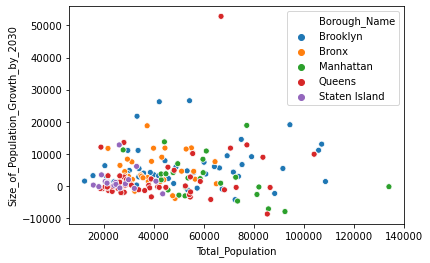

In [48]:
sns.scatterplot(x = "Total_Population", y = 'Size_of_Population_Growth_by_2030', data=imp, hue='Borough_Name')
plt.show()

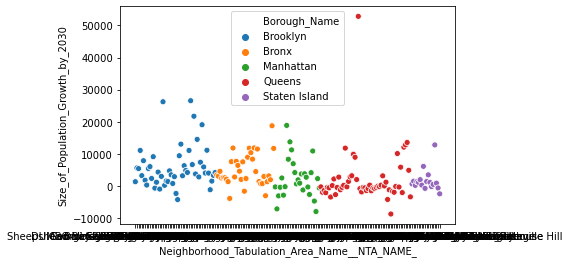

In [49]:
sns.scatterplot(x = "Neighborhood_Tabulation_Area_Name__NTA_NAME_", y = 'Size_of_Population_Growth_by_2030', data=imp, hue='Borough_Name')
plt.show()

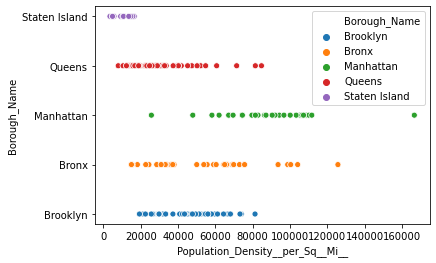

In [50]:
sns.scatterplot(x = 'Population_Density__per_Sq__Mi__', y = "Borough_Name", data=imp, hue='Borough_Name')
plt.show()

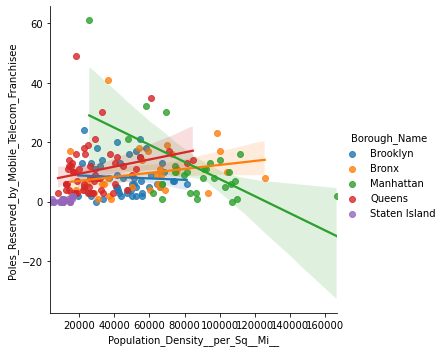

In [51]:
sns.lmplot(x = 'Population_Density__per_Sq__Mi__', y = 'Poles_Reserved_by_Mobile_Telecom_Franchisee', data=imp, hue='Borough_Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

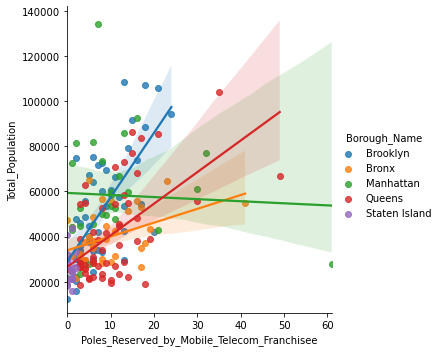

In [52]:
sns.lmplot(x = 'Poles_Reserved_by_Mobile_Telecom_Franchisee', y = 'Total_Population', data=imp, hue='Borough_Name')
plt.show()

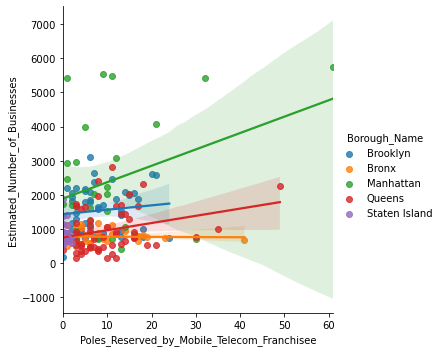

In [53]:
sns.lmplot(x = 'Poles_Reserved_by_Mobile_Telecom_Franchisee', y = 'Estimated_Number_of_Businesses', data=imp, hue='Borough_Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

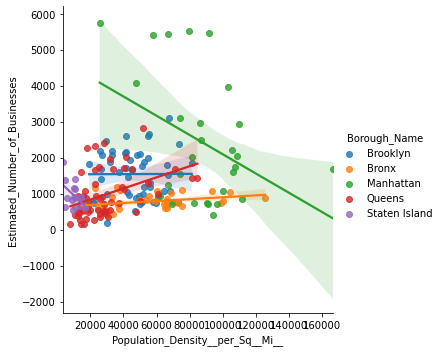

In [54]:
sns.lmplot(x = 'Population_Density__per_Sq__Mi__', y = 'Estimated_Number_of_Businesses', data=imp, hue='Borough_Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

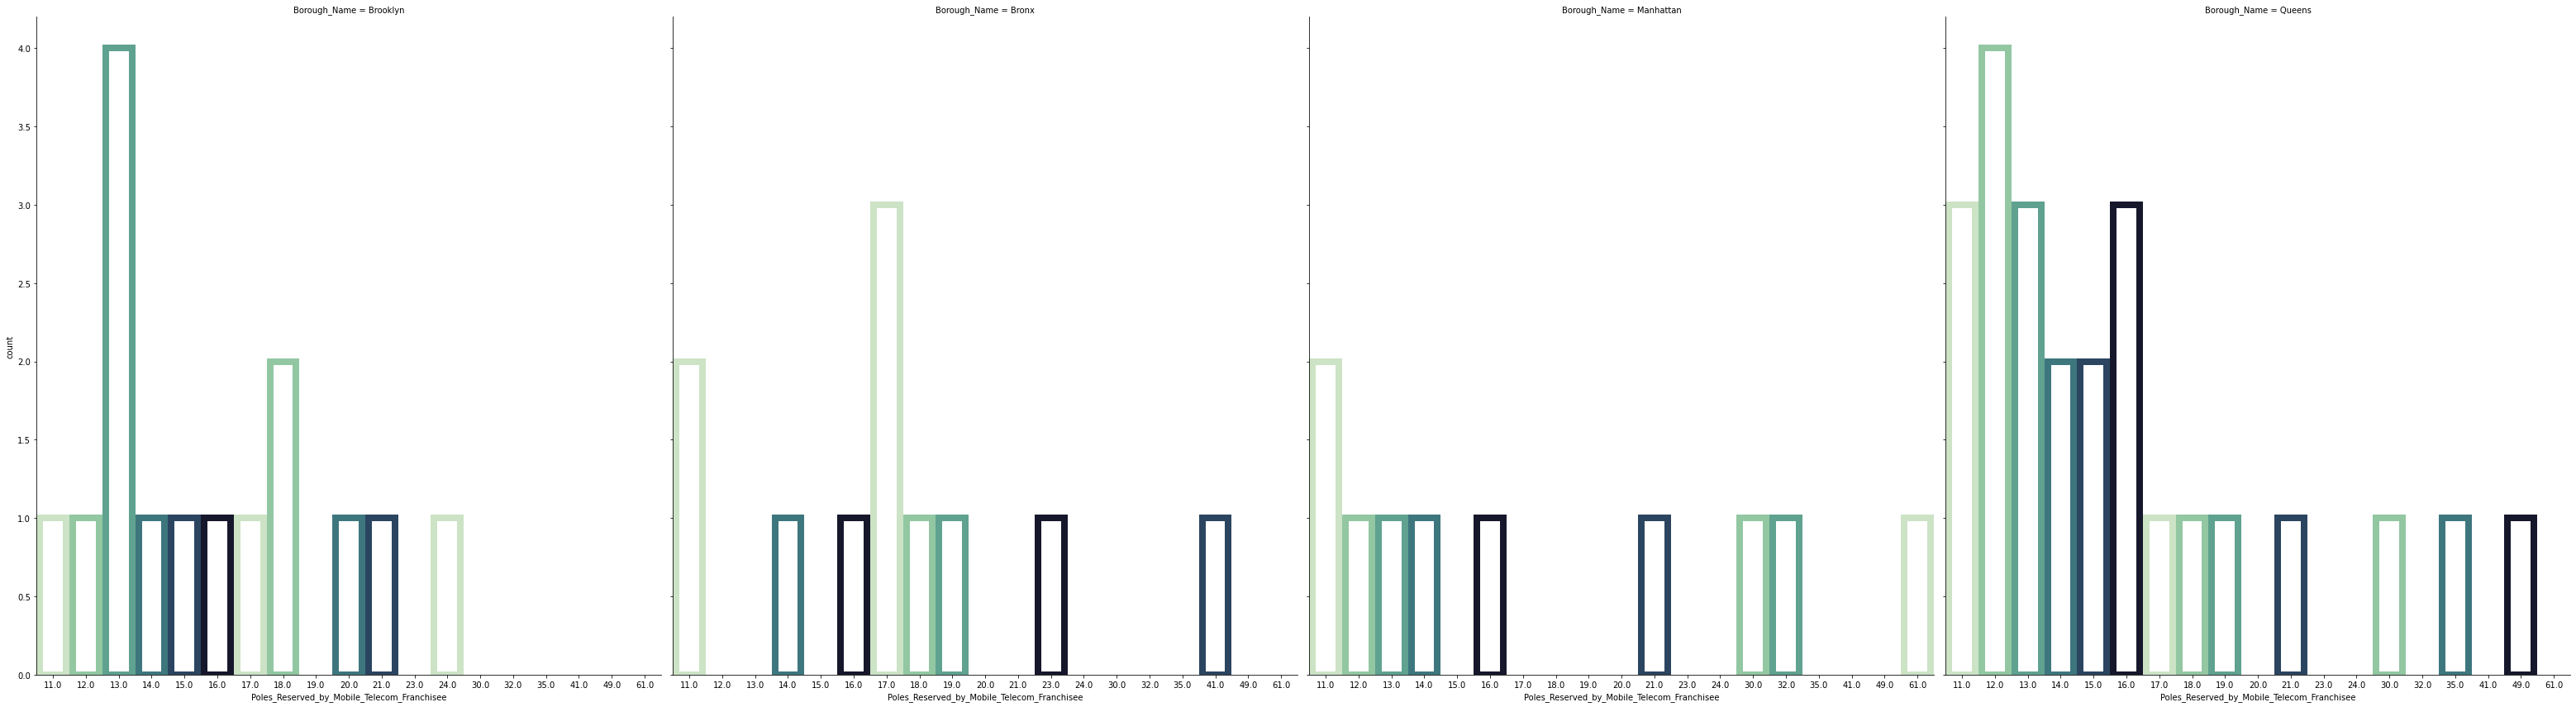

In [55]:
g = sns.catplot('Poles_Reserved_by_Mobile_Telecom_Franchisee', col='Borough_Name', col_wrap=4, data=imp[#(FINAL['renta']> 175000) & 
    (imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']>10)],kind="count", height=12, aspect=.9, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))

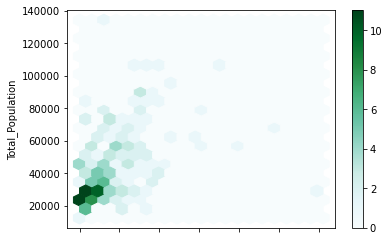

In [56]:
imp.plot(kind='hexbin', y='Total_Population', x='Poles_Reserved_by_Mobile_Telecom_Franchisee', gridsize=20)

In [57]:
import plotly.express as px

In [58]:
# import plotly.express as px
# df = px.data.gapminder()
# fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
#            size="pop", color="continent", hover_name="country", facet_col="continent",
#            log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
# fig.show()

#### SAVE DATA FRAMES TO CSV FOR TABLEAU USE

In [59]:
mtf2.to_csv('mtf2.csv', index = False, header=True)
imp.to_csv('imp.csv', index = False, header=True)


In [60]:
mtf_Fran_Count.to_csv('mtf_Fran_Count.csv', index = True, header=True)

In [61]:
mtf_Fran_Count2.to_csv('mtf_Fran_Count2.csv', index = True, header=True)

#### LINEAR REGRESSION MODEL

In [129]:
from sklearn.model_selection import train_test_split

In [140]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = imp.iloc[:,0], imp.drop(columns=imp.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, imp.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [141]:
X = imp[['Total_Population',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider', 
         'Population_Density__per_Sq__Mi__', 
         'Size_of_Population_Growth_by_2030',
         'Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise',
         'Percentage_of_Blocks_WITH_Commercial_Fiber_Provider',
         'Estimated_Number_of_Businesses', 
         'Fiber_Drops,_Estimated_Relative_Costs',
         'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider',  
         'Commercial_Fiber_Max_ISP_Choice_by_NTA']]

In [142]:
y = imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [144]:
imp_train = pd.concat([X_train, y_train], axis = 1)

In [145]:
imp_test = pd.concat([X_test,y_test], axis = 1)


In [146]:
linear_model = smf.ols(formula='Poles_Reserved_by_Mobile_Telecom_Franchisee ~  Estimated_Number_of_Businesses + Total_Population + Size_of_Population_Growth_by_2030 + Percentage_of_Blocks_WITH_Commercial_Fiber_Provider + Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves', data=imp_train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Poles_Reserved_by_Mobile_Telecom_Franchisee   R-squared:                       0.341
Model:                                                     OLS   Adj. R-squared:                  0.317
Method:                                          Least Squares   F-statistic:                     13.98
Date:                                         Sun, 27 Sep 2020   Prob (F-statistic):           5.19e-11
Time:                                                 15:19:14   Log-Likelihood:                -479.42
No. Observations:                                          141   AIC:                             970.8
Df Residuals:                                              135   BIC:                             988.5
Df Model:                                                    5                                         
Covariance Type:                                     nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      0.5007      6.533      0.077      0.939     -12.419      13.420
Estimated_Number_of_Businesses                                 0.0008      0.001      1.139      0.257      -0.001       0.002
Total_Population                                               0.0001   3.15e-05      4.693      0.000    8.54e-05       0.000
Size_of_Population_Growth_by_2030                              0.0006   9.96e-05      5.856      0.000       0.000       0.001
Percentage_of_Blocks_WITH_Commercial_Fiber_Provider            5.3146      5.519      0.963      0.337      -5.600      16.230
Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves    -1.4936      1.229     -1.215      0.226      -3.924       0.937
==============================================================================
Omnibus:                       95.284   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              947.896
Skew:                           2.205   Prob(JB):                    1.47e-206
Kurtosis:                      14.912   Cond. No.                     6.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
predictions = linear_model.predict(imp_test)

In [148]:
predictions = predictions.dropna()

In [149]:
imp_test = imp_test.dropna()

In [150]:
r2_score(imp_test['Poles_Reserved_by_Mobile_Telecom_Franchisee'], predictions)

0.4438202484992555

In [151]:
imp.Poles_Reserved_by_Mobile_Telecom_Franchisee.sum()

1652.0

In [152]:
imp.Total_Population.sum()

8450175

In [155]:
imp.Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise.mean()

25.54787234042553

In [157]:
imp.describe()

,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,Mobile_Broadband_Adoption__Percentage_of_Households_,Mobile_Dependent_Households__Percentage_of_Households_,Residential_Broadband_Choice_Average_by_NTA,Commercial_Fiber_ISP_Choice_Average_by_NTA,Commercial_Fiber_Max_ISP_Choice_by_NTA,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Empire_City_Subway_Coverage__Percentage_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Percentage_of_Blocks_WITH_Commercial_Fiber_Provider,Size_of_Population_Growth_by_2030,2030_Population_Density
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,44947.739362,45703.289096,16713.010638,1.394043,44.430851,0.699415,0.709202,0.056223,2.263830,1.613830,3.436170,0.139628,0.989681,0.904202,2.356383,17.031915,11.547872,1300.835106,16711.627660,18012.462766,489.957447,48570.005319,697.686170,2694.175532,55.845745,1032.292553,2.840426,9.648936,7.404255,0.212766,82.845745,78.335106,17.787234,0.101064,8.526596,9.500000,3.744681,8.787234,25.547872,0.903191,0.137553,0.758191,1.473404,0.613830,0.630851,3.984043,1.000000,0.295644,106.861702,19.781915,0.860372,3622.265957,49717.061264
std,22010.949278,29408.235063,9357.621194,1.195674,22.883348,0.097202,0.073229,0.027519,0.629889,0.812351,1.932323,0.126763,0.027651,0.173984,1.771918,27.274972,24.069259,1004.630679,9323.807056,9729.445275,313.190991,23897.626296,567.275751,2041.416281,149.988102,1991.176310,5.172538,6.900682,7.006978,0.618301,42.052204,93.527196,10.622217,0.351314,8.418488,20.115309,7.431593,8.564786,28.831482,0.824022,0.259912,0.309994,0.769982,0.400918,0.399053,0.613799,0.812543,0.281703,91.680345,18.962961,0.126763,6702.972789,31579.284992
min,12388.000000,3479.590000,5667.000000,0.200000,10.000000,0.230000,0.340000,0.020000,1.200000,1.000000,1.000000,